# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 2\Lab 5\Employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [3]:
employees.shape

(9, 7)

In [4]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [5]:
# Method 1
#The index columns are the columns we are going to group by.
#Values allow us to specify the columns that are aggregated.
#The default aggregation function is the mean. 

employees.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean) 

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [6]:
# Method 2
mean = pd.DataFrame(employees.groupby(['Department'])['Salary'].mean())
mean

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [7]:
print((employees['Department'] == 'HR').sum())
print((employees['Department'] == 'IT').sum())
print((employees['Department'] == 'Sales').sum())

3
4
2


In [8]:
# your code here
employees1 = pd.DataFrame(employees.groupby(['Department', 'Title'])['Salary'].mean())
employees1

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [9]:
# your code here
employees.pivot_table(index=["Title"], values=["Years", "Salary"], fill_value=0)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [10]:
# your code here
conditions = [
    (employees['Department'] == 'HR'),
    (employees['Department'] == 'IT'),
    (employees['Department'] == 'Sales')
    ]

# create a list of the values we want to assign for each condition
values = [(employees['Department'] == 'HR').sum(), (employees['Department'] == 'IT').sum(), (employees['Department'] == 'Sales').sum()] 

# create a new column and use np.select to assign values to it using our lists as arguments

employees['Number_of_employees'] = np.select(conditions, values) 

employees



,Name,Department,Education,Gender,Title,Years,Salary,Number_of_employees
0,Jose,IT,Bachelor,M,analyst,1,35,4
1,Maria,IT,Master,F,analyst,2,30,4
2,David,HR,Master,M,analyst,2,30,3
3,Sonia,HR,Bachelor,F,analyst,4,35,3
4,Samuel,Sales,Master,M,associate,3,55,2
5,Eva,Sales,Bachelor,F,associate,2,55,2
6,Carlos,IT,Master,M,VP,8,70,4
7,Pedro,IT,Phd,M,associate,7,60,4
8,Ana,HR,Master,F,VP,8,70,3


In [11]:
(employees['Department'] == 'HR').sum()

3

In [12]:
#The default aggregation function is the mean
employees.pivot_table(index=["Department", "Number_of_employees", "Title"], values=["Salary"])

Salary
Department Number_of_employees Title            
HR         3                   VP           70.0
                               analyst      32.5
IT         4                   VP           70.0
                               analyst      32.5
                               associate    60.0
Sales      2                   associate    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [13]:
# your code here
#median
employees.pivot_table(index=["Department", "Number_of_employees", "Title"], values=["Salary"], aggfunc=np.median)

Salary
Department Number_of_employees Title            
HR         3                   VP           70.0
                               analyst      32.5
IT         4                   VP           70.0
                               analyst      32.5
                               associate    60.0
Sales      2                   associate    55.0

In [14]:
#max
employees.pivot_table(index=["Department", "Number_of_employees", "Title"], values=["Salary"], aggfunc=max)

Salary
Department Number_of_employees Title            
HR         3                   VP             70
                               analyst        35
IT         4                   VP             70
                               analyst        35
                               associate      60
Sales      2                   associate      55

In [15]:
#min
employees.pivot_table(index=["Department", "Number_of_employees", "Title"], values=["Salary"], aggfunc=np.min)

Salary
Department Number_of_employees Title            
HR         3                   VP             70
                               analyst        30
IT         4                   VP             70
                               analyst        30
                               associate      60
Sales      2                   associate      55

In [16]:
#std
employees.pivot_table(index=["Department", "Number_of_employees", "Title"], values=["Salary"], aggfunc=np.std)

,,,Salary
Department,Number_of_employees,Title,
HR,3,analyst,3.535534
IT,4,analyst,3.535534
Sales,2,associate,0.000000


In [ ]:
"""
your commments here
"""

The max and min salary of the VP in HR is the same with 70k because we have 1 only VP HR.
Same in IT, the max and min salary of the VP in HR is the same with 70k because we have 1 only VP HR.

Analysts in HR have an average salary of 32.5k that is also the median. The highest salary for this position in this field is 35k and the lowest is 30k.
Same in IT, Analysts in IT have an average salary of 32.5k that is also the median. The highest salary for this position in this field is 35k and the lowest is 30k.

Each associate is sales has a salary of 55k.


#### Based on your comments, fill the missing values with an appropriate value.

In [17]:
# your code here

employees.isnull().sum()

Name                   0
Department             0
Education              0
Gender                 0
Title                  0
Years                  0
Salary                 0
Number_of_employees    0
dtype: int64

In [ ]:
We don't have missing values.

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [18]:
# your code here
employees.pivot_table(index=["Department","Number_of_employees"], values=["Salary"], aggfunc=sum)

,,Salary
Department,Number_of_employees,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [19]:
# your code here

employees.pivot_table(index=["Department","Title",] ,values=["Salary", "Years"])
                    

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

In [20]:
employees.groupby('Department').mean()['Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [21]:
pd.pivot_table(employees, index=['Department', 'Title'], columns='Years', values='Salary')

Years                    1     2     3     4     7     8
Department Title                                        
HR         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst     NaN  30.0   NaN  35.0   NaN   NaN
IT         VP          NaN   NaN   NaN   NaN   NaN  70.0
           analyst    35.0  30.0   NaN   NaN   NaN   NaN
           associate   NaN   NaN   NaN   NaN  60.0   NaN
Sales      associate   NaN  55.0  55.0   NaN   NaN   NaN

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [22]:
# your code here
fitbit = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 2\Lab 5\Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [23]:
fitbit.shape

(367, 14)

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [24]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [25]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [26]:
# your code here
#1st method
correlation = np.corrcoef(fitbit['Minutes Very Active'], fitbit['Steps'])
correlation 

array([[1.        , 0.57145185],
       [0.57145185, 1.        ]])

In [27]:
#2nd method
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

correlation 

0.5714518481062612

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [28]:
import matplotlib.pyplot as plt;

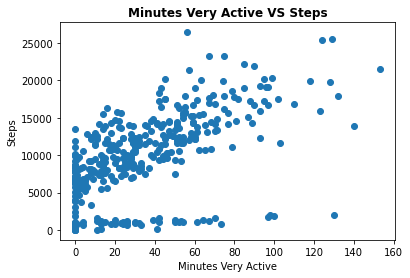

In [29]:
"""
plt.scatter(#, #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Minutes Very Active VS Steps', fontweight=700)
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [31]:
"""
your commments here
"""
The variables are positively correlate with a high level of correlation. 
If the Number of steps increases, then the number minutes very active also increased. 
If the number of steps decreases, then the number minutes very active also decreases.

SyntaxError: invalid syntax (<ipython-input-31-003722bad0bd>, line 4)

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [32]:
# your code here
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation

0.07690608062990098

In [33]:
correlation = np.corrcoef(fitbit['Minutes Sedentary'], fitbit['Steps'])
correlation 

array([[1.        , 0.07690608],
       [0.07690608, 1.        ]])

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

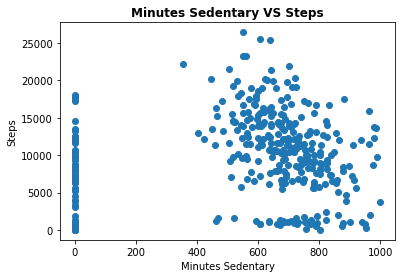

In [34]:
# your code here

plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Minutes Sedentary VS Steps', fontweight=700)
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""
The correlation is close to 0 and as per the graph. there is no correlation.


#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [35]:
# your code here
correlation = np.corrcoef(fitbit['MinutesOfSleep'], fitbit['Steps'])
correlation 

array([[1.        , 0.13098566],
       [0.13098566, 1.        ]])

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

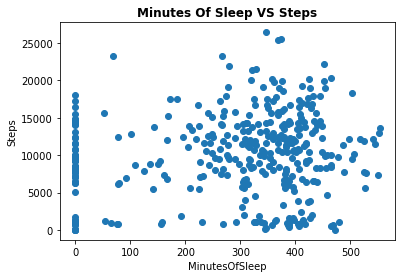

In [36]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Minutes Of Sleep VS Steps', fontweight=700)
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""
The correlation is close to 0 and as per the graph. there is no correlation.
.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [37]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']


In [38]:
# your code here

cor_fit = fitbit[['Calorie burned', 'Steps','Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [39]:
# your code here

cor_fit.sort_values(by ='Steps')

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [40]:
# your code here
times_grade = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Labs done\Labs module 2\Lab 5\Time_grades.csv')
times_grade.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [41]:
times_grade.shape

(15, 3)

#### Show visually the frequency distribution of the `time_grades` dataset.

In [42]:
# your code here
#Cumulative frequency  x['cum_freq']= np.cumsum(x['Salary'])
times_grade['cum_freq Study'] = np.cumsum(times_grade['Study time'])
times_grade['cum_freq Grade'] = np.cumsum(times_grade['Grade'])
times_grade

,Name,Study time,Grade,cum_freq Study,cum_freq Grade
0,Jose,4,4,4,4
1,Maria,9,7,13,11
2,David,8,9,21,20
3,Sonia,10,7,31,27
4,Samuel,20,9,51,36
5,Eva,5,3,56,39
6,Carlos,12,7,68,46
7,Pedro,6,5,74,51
8,Ana,18,9,92,60
9,Gervasio,7,3,99,63


#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [48]:
# your code here
#Pearson correlation
times_grade[['Study time', 'Grade']].corr()


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [50]:
#spearman method
times_grade[['Study time', 'Grade']].corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

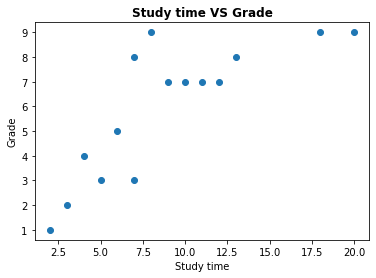

In [47]:
# your code here
plt.scatter(times_grade['Study time'], times_grade['Grade'])
plt.title('Study time VS Grade', fontweight=700)
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
your commments here
"""
The variables are positively correlate with a high level of correlation. 
If the Number of study time increases, then the grade increases. 
If the number of study time decreases, then the grade decreases.

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""
Pearson correlation measures linear correlation and Spearman correlation is a non-parametric measure of correlation based on the position